# Assignment 4 - Telco Customer Churn

In [61]:
#Importing necessary modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [62]:
#Importing the dataset
telco = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
telco.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
#Getting information about the data
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
#Checking for missing values
telco.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [11]:
#Summary Statistics for numeric values
telco.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


## Q1 Demographic:
### 1a) Which 2 demographics have proven to be the most popular with the telco brand?

Text(0.5, 1.0, 'Dependents vs Churn')

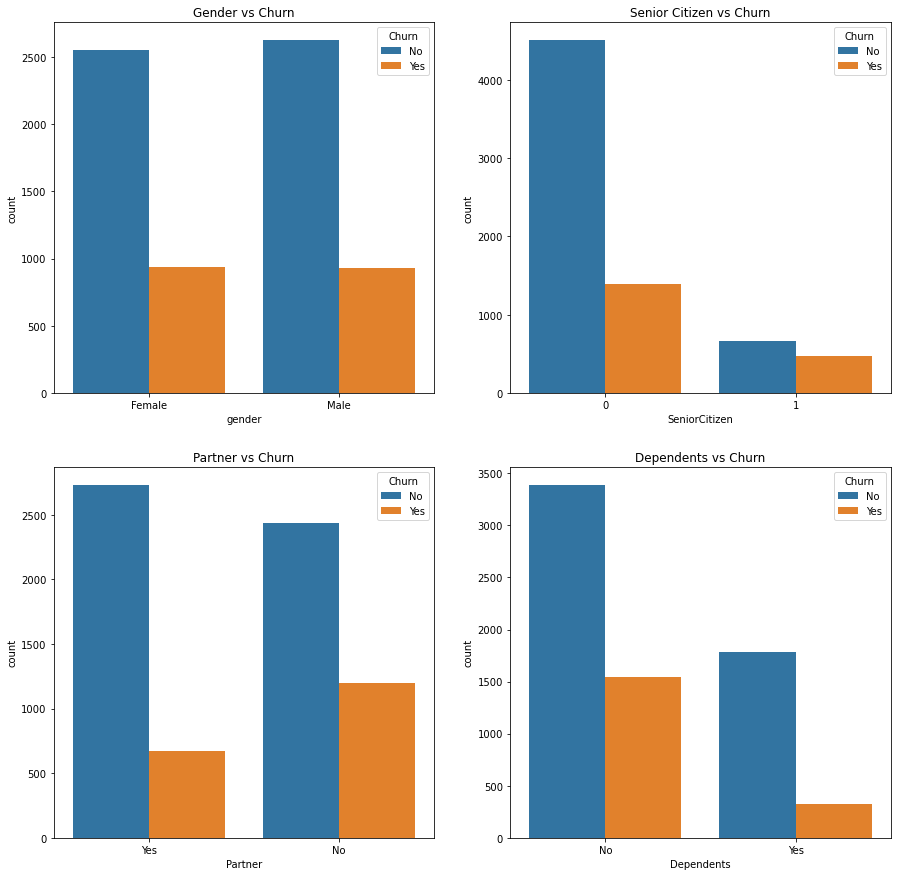

In [34]:
#Creating a figure of demographics for 4 subplots (2 rows, 2 columns) 
fig, ax = plt.subplots(2, 2, figsize = (15,15))
sns.countplot(x = "gender", data = telco, hue = "Churn",ax = ax[0][0])
ax[0][0].set_title("Gender vs Churn")
sns.countplot(x = "SeniorCitizen", data = telco, hue = "Churn", ax = ax[0][1])
ax[0][1].set_title("Senior Citizen vs Churn")
sns.countplot(x = "Partner", data = telco, hue = "Churn", ax = ax[1][0])
ax[1][0].set_title("Partner vs Churn")
sns.countplot(x = "Dependents", data = telco, hue = "Churn", ax = ax[1][1])
ax[1][1].set_title("Dependents vs Churn")

1a) The most popular demographics which have proven to be the most popular with the telco brand are the Non-dependents and the Young citizens.

1b) The Marketing team should target the customers with no dependents and customers with no partners because they ar more likely to churn for the Telco service

# Q2 Services

### 2a) Which 3 services are contributing to a higher monthly charge and resulting to customers churning? (Use visualizations in explaining your analysis)

In [29]:
#Creating a variable for the services, Monthly Charges and churn
telco_services = telco.iloc[:,6:15]
telco_services.head()

,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,No,No phone service,DSL,No,Yes,No,No,No,No
1,Yes,No,DSL,Yes,No,Yes,No,No,No
2,Yes,No,DSL,Yes,Yes,No,No,No,No
3,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,Yes,No,Fiber optic,No,No,No,No,No,No


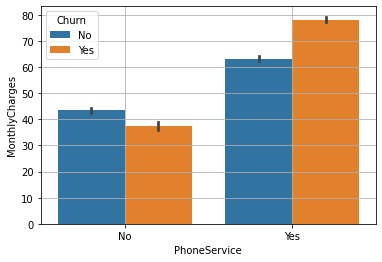

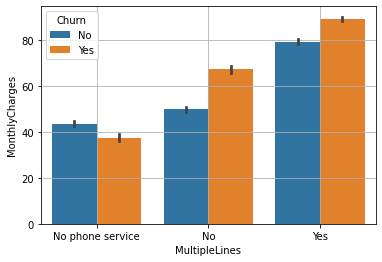

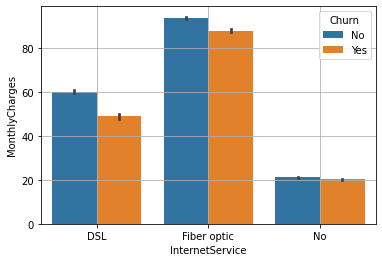

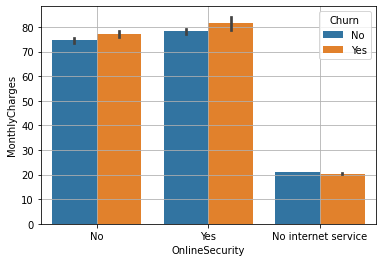

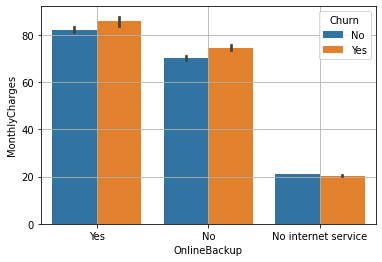

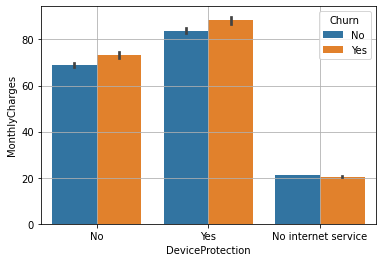

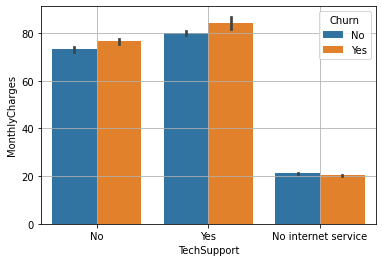

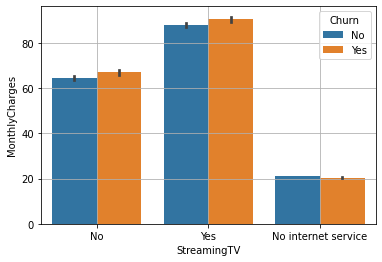

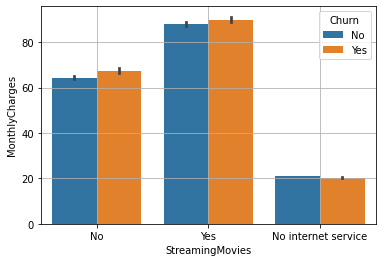

In [45]:
for service in telco_services:
    sns.barplot(x=service,y='MonthlyCharges',hue='Churn',data=telco)
    plt.grid()
    plt.show()

Streaming Movies, Streaming TV and Device Protection services are contributing to a higher monthly charge and resulting tocustomers churning

### 2b) If the telco was to offer Phone as a standalone service, which type of contract would encourage customer retention?

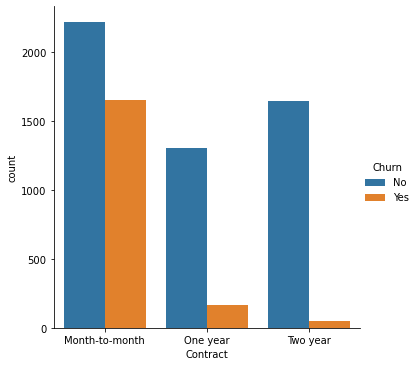

In [33]:
sns.catplot(x='Contract',data=telco,hue='Churn',kind='count')

In [32]:
#Creating a crosstab for type of contract
pd.crosstab(telco['Contract'],telco['Churn'])

Churn,No,Yes
Contract,,
Month-to-month,2220,1655
One year,1307,166
Two year,1647,48


The month to month contract would encourage customer retention

# 3. Payment

3a) If the company was to streamline all its services into 3 bouquet packages, what monthly prices will be appropriate for the following packages to keep customers from churning:
i. Basic
ii. Plus
iii. Premium

<AxesSubplot:xlabel='PaperlessBilling', ylabel='MonthlyCharges'>

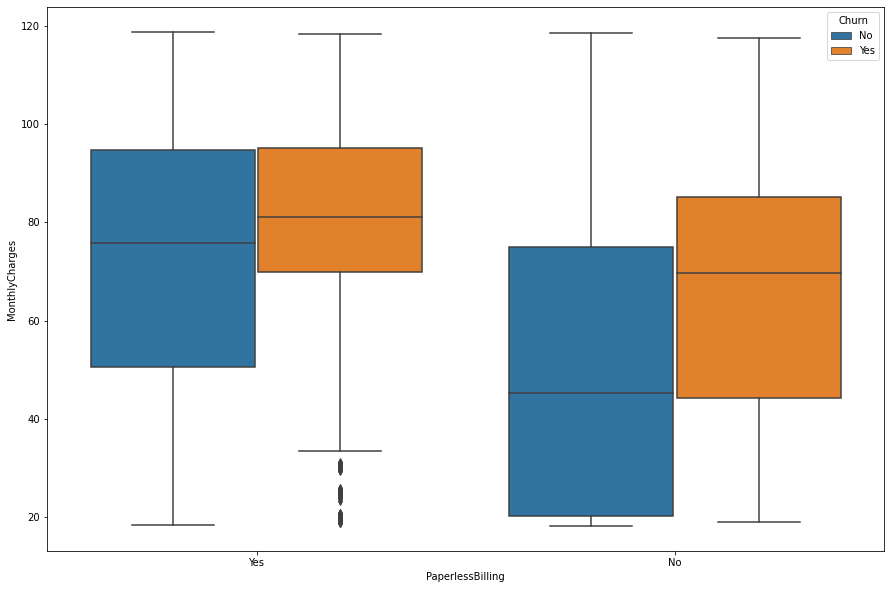

In [65]:
plt.figure(figsize=(15,10))
sns.boxplot(x='PaperlessBilling',y='MonthlyCharges',hue='Churn',data=telco)

1. Basic = 18.25
2. Plus = 64.42 
3. Premium 118.75

3b) Should the company strictly go paperless for their monthly billings as a technique of keeping their customers and why?

In [51]:
paper = pd.crosstab(telco['PaperlessBilling'],telco['Churn'])
paper

Churn,No,Yes
PaperlessBilling,,
No,2403,469
Yes,2771,1400


<AxesSubplot:xlabel='PaperlessBilling', ylabel='count'>

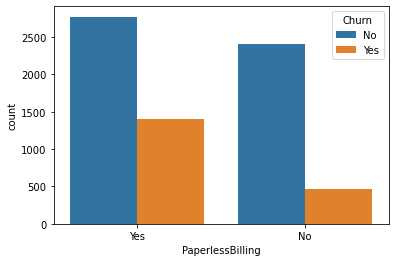

In [56]:
sns.countplot(data=telco, x='PaperlessBilling', hue='Churn')

The company should not go completely paperless since they have a significant number of customers who do not use paperless billing and do not churn.